In [1]:
# Importo las librerías necesarias
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



**Corte de tejido:** Imagen representativa de cómo se consiguen las muestras.

Se toman láminas de un tejido y se ponen sobre una placa que contiene oligonucleótidos marcados y separados por spots (spots viene del inglés y se refiere a puntos específicos, osea, tengo varias áreas delimitadas en ese espacio 2d del corte del tejido), esos códigos de barrra (o marcaje) se hibridan con el ARNm que se liberará de las células, así podemos analizar qué se expresa, en qué cantidad y la posición del tejido donde se expresa. No sólo se hace con spots, algunas tecnologías permiten trabajar con células individuales.

Al final obtenemos para cada spot o cada celula:
Coordenadas espaciales, perfil de expresión de genes y la posibilidad de mapearlo visualmente

![Corte de tejido](../imágenes/tejido_corte.png)



In [2]:
# Ahora vamos a hacer algunas configuraciones

# facecolor hacer que los fondos de las figuras sean blancos y figsize hace que el tamaño sea de 8x8 pulgadas
sc.set_figure_params(facecolor="white", figsize=(8,8))


# El nivel de verbosidad define el detalle que se da sobre los pasos, análisis intermedios e información sobre los resultados finales, se suele disminuir en análisis muy grandes
sc.settings.verbosity = 3




In [4]:
# Los datos provienen de un conjunto de datos de transcriptómica espacia de Visium de ganglio linfático humano

# Descargamos los datos
adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node") # Esto descarga los datos y los vuelve un AnnData. AnnData es la estructura de datos que usa scanpy para sus análisis, es como microeco y las microtablas

# Ahora asignamos etiquetas a las anotaciones de genes duplicados para que cada nombre de gen sea único
adata.var_names_make_unique()

# Marcamos los genes mitocondriales con una nueva columna
adata.var["mt"] = adata.var_names.str.startswith("MT-")

# Ahora calculamos métricas de calidad
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

# Hasta aquí es muy similar a los análisis de single-cell

C:\Users\jupas\AppData\Local\Temp\ipykernel_17872\103192226.py:4: FutureWarning: Use `squidpy.datasets.visium` instead.
  adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node") # Esto descarga los datos y los vuelve un AnnData. AnnData es la estructura de datos que usa scanpy para sus análisis, es como microeco y las microtablas


  0%|          | 0.00/7.86M [00:00<?, ?B/s]

  0%|          | 0.00/29.3M [00:00<?, ?B/s]

c:\Users\jupas\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\datasets\_datasets.py:555: FutureWarning: Use `squidpy.read.visium` instead.
  return read_visium(sample_dir, source_image_path=source_image_path)
c:\Users\jupas\AppData\Local\Programs\Python\Python313\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\jupas\AppData\Local\Programs\Python\Python313\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
# Los resultados de las métricas se guardan en "obs" y "var". Ademas en "uns" se guardan las imágenes del tejido y los metadatos y en "obsm" se guardan las coordenadas de los spots

adata

AnnData object with n_obs × n_vars = 4035 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

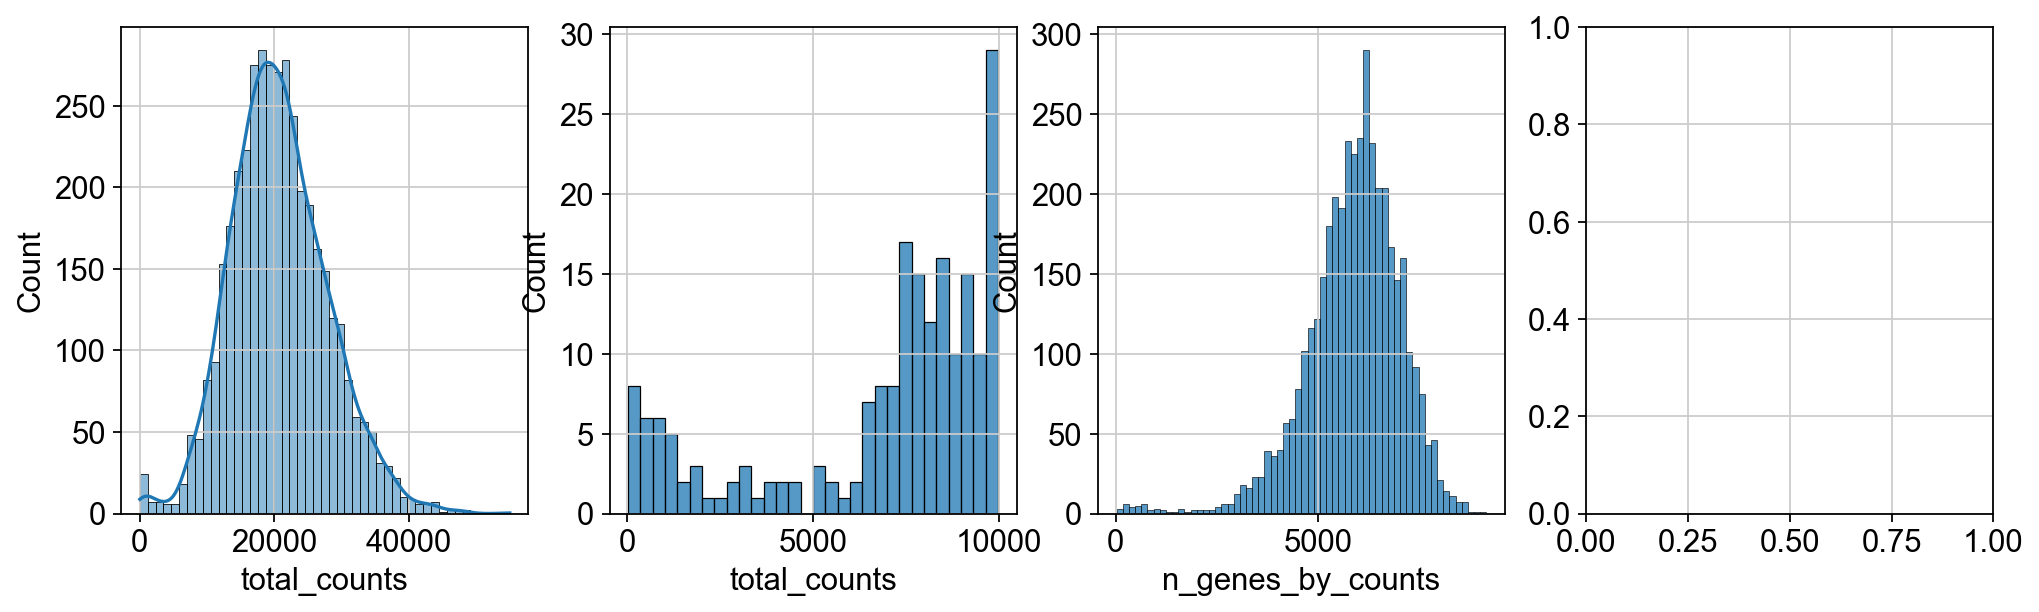

In [ ]:
# Aquí debo tenerlo presente para aprender a graficar

# Aquí creamos un gráfico de 1 fila con 4 columnas, 
fig, axs =plt.subplots(1,4, figsize=(15,4))

# Histograma de "total_counts" (número de reads por cada spot)
sns.histplot(adata.obs["total_counts"], kde=True, ax=axs[0])

# En el tutorial hacen un filtrado para spots con menos de 10000 counts, pero en mi opinión en este caso sería malo porque tenemos una distribución normal, pero sería algo así
sns.histplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=30, ax=axs[1],)

# Histograma de genes por spot
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])

# Se puede también hacer el filtrado para genes con 